In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord
import astropy.units as u

import sys
import os
import glob
from tqdm import tqdm

In [2]:
folder = 'C:/Users/oryan/Documents/mergers-in-cosmos'
data_folder = f'{folder}/data'
results = f'{folder}/results'

drive_folder = 'E:/cosmos-data'

In [3]:
with fits.open(f'{drive_folder}/COSMOS2020_CLASSIC_R1_v2.1_p3.fits.gz') as hdul:
    header = hdul[1].header
    data = hdul[1].data

In [11]:
df = pd.read_csv(f'{data_folder}/catalogue-matched-cosmos-2020.csv', index_col = 0)
df_control = pd.read_csv(f'{results}/control_manifest.csv', index_col = 0)

In [5]:
data_red = Table(data)[['ID', 'lp_mass_best', 'ez_z_phot', 'ez_LIR', 'ez_L2800']]

In [13]:
del data

In [9]:
names = list(data_red.columns)
init_dict = {}
for i in names:
    init_dict[i] = None

In [33]:
def get_dict_values(sourceid, data, init_dict):
    export_dict = init_dict.copy()
    row = data[data['ID'] == sourceid]
        
    for key in list(export_dict.keys()):
        export_dict[key] = row[key][0]
    

    return export_dict

In [41]:
control_dict = {}
for i in tqdm(range(len(df_control))):
    idx = df_control.ID.iloc[i]
    control_id = df_control.control_ID.iloc[i]
    control_dict[idx] = get_dict_values(control_id, data_red, init_dict)

100%|██████████| 6759/6759 [00:54<00:00, 125.03it/s]


In [43]:
control_param_df = (
    pd.DataFrame.from_dict(control_dict, orient = 'index')
    .reset_index()
    .rename(columns = {'ID' : 'control_ID', 'index' : 'ID'})
)

In [45]:
df_sfr_calc = (
    control_param_df
    .assign(log_sfr_tot = control_param_df.apply(lambda row: np.log10((3.234e-10 * row.ez_L2800) + (0.98e-10 * row.ez_LIR)) , axis = 1))
)

In [48]:
df

,SourceID,ID_1,ALPHA_J2000_1,DELTA_J2000_1,X_IMAGE_1,Y_IMAGE_1,ERRX2_IMAGE_1,ERRY2_IMAGE_1,ERRXY_IMAGE_1,FLUX_RADIUS_1,...,ez_ssfr_p025_2,ez_ssfr_p160_2,ez_ssfr_p500_2,ez_ssfr_p840_2,ez_ssfr_p975_2,ez_Av_p025_2,ez_Av_p160_2,ez_Av_p500_2,ez_Av_p840_2,ez_Av_p975_2
0,4000705532984,857121.0,150.673667,2.226291,9348.870117,22451.160156,0.000002,0.000004,1.265998e-08,8.876858,...,-8.385987,-8.323476,-8.259419,-8.171948,-8.081048,0.595371,0.783795,0.924471,1.022045,1.076083
1,4000705533312,873195.0,150.668102,2.242849,9482.499023,22848.505859,0.000007,0.000002,1.829277e-06,5.542504,...,-8.962106,-8.711401,-8.478580,-8.303174,-8.135300,0.082679,0.231435,0.436111,0.622873,0.829844
2,4000705533383,861738.0,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,1.332813e-05,5.169795,...,-9.779914,-9.521317,-9.042374,-8.946216,-8.919963,0.570974,0.686736,0.964232,1.396826,1.587413
3,4000705539435,1280765.0,149.702469,2.636086,32637.894531,32285.564453,0.000561,0.000900,1.408110e-05,4.764572,...,-10.821019,-10.378546,-10.191748,-10.048404,-9.860973,0.251250,0.657133,1.055286,1.348915,1.713512
4,4000705539529,1284864.0,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,1.244353e-06,6.412690,...,-8.389942,-8.324630,-8.253101,-8.180449,-8.090549,0.360573,0.404528,0.450688,0.494164,0.550538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,6000536185363,1299189.0,150.498992,2.652105,13540.829102,32669.794922,0.000034,0.000021,-3.025893e-06,6.936677,...,-9.307705,-9.179163,-9.043135,-8.935645,-8.897905,0.939483,0.982316,1.048312,1.108769,1.154593
3736,6000536185496,1308675.0,150.501162,2.663109,13488.861328,32933.941406,0.000085,0.000062,1.369181e-05,5.260444,...,-9.680077,-9.645065,-9.610534,-9.580824,-9.555204,0.058711,0.189657,0.304278,0.435281,0.542515
3737,6000536185585,1317966.0,150.487598,2.671303,13814.117188,33130.523438,0.000014,0.000013,-3.564242e-06,5.304535,...,-8.546148,-8.497480,-8.455174,-8.411234,-8.386809,0.948853,0.995218,1.045390,1.088478,1.127819
3738,6000536185603,1320733.0,150.508423,2.673144,13314.836914,33174.851562,0.000021,0.000046,-4.340081e-06,4.414364,...,-9.697964,-9.584126,-9.493108,-9.432188,-9.395185,0.026873,0.026873,0.120597,0.258239,0.321697


In [52]:
df_prim = (
    df[['ID_1', 'lp_mass_best_1', 'ez_z_phot_1', 'ez_LIR_1', 'ez_L2800_1']]
    .rename(columns = {'ID_1':'ID', 'lp_mass_best_1':'lp_mass_best', 'ez_LIR_1':'ez_LIR', 'ez_L2800_1':'ez_L2800', 'ez_z_phot_1':'ez_z_phot'})
)
df_sec = (
    df[['ID_2', 'lp_mass_best_2', 'ez_z_phot_2', 'ez_LIR_2', 'ez_L2800_2']]
    .rename(columns = {'ID_2':'ID', 'lp_mass_best_2':'lp_mass_best', 'ez_LIR_2':'ez_LIR', 'ez_L2800_2':'ez_L2800', 'ez_z_phot_2':'ez_z_phot'})
)

In [56]:
df_comb = pd.concat([df_prim, df_sec]).dropna()

In [94]:
df_sfr_samp = (
    df_comb
    .assign(log_sfr_tot = df_comb.apply(lambda row: np.log10((3.234e-10 * row.ez_L2800) + (0.98e-10 * row.ez_LIR)) , axis = 1))
    .query('lp_mass_best > 5.0')
    .dropna()
)

In [95]:
df_match = df_sfr_calc[['ID', 'control_ID']]

In [96]:
df_sfr_samp_red = (
    df_match
    .merge(df_sfr_samp, on = 'ID', how = 'left')
    .drop_duplicates('ID', keep='first')
    .dropna()
)

### Checking Samples

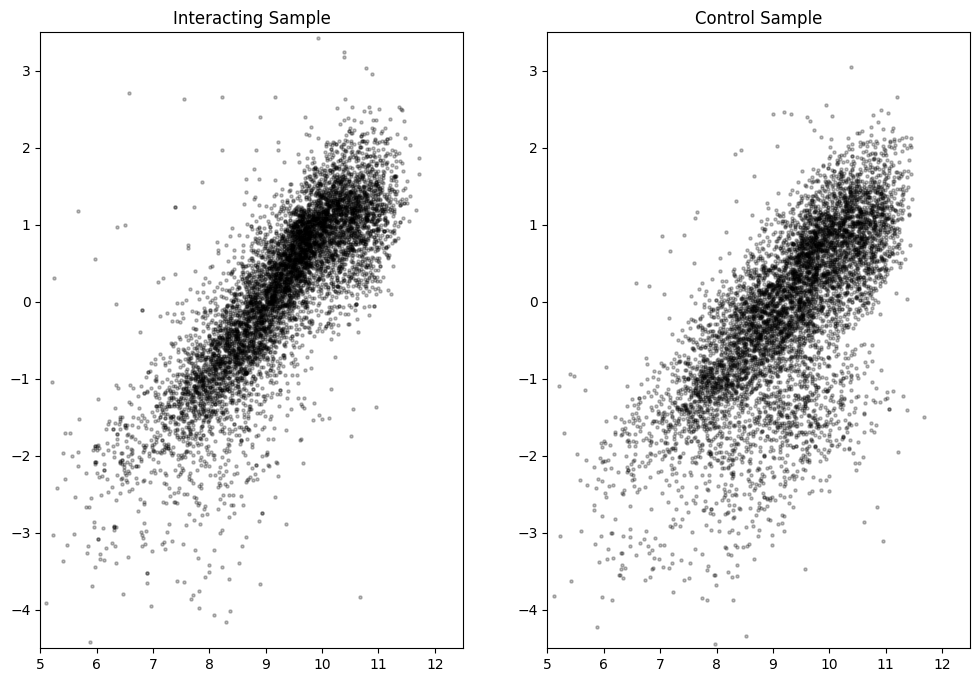

In [97]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,8))
ax[0].scatter(list(df_sfr_samp.lp_mass_best), list(df_sfr_samp.log_sfr_tot), s = 5, color = 'black', alpha = 0.25)
ax[0].set_xlim(5,12.5)
ax[0].set_ylim(-4.5,3.5)
ax[0].set_title('Interacting Sample')

ax[1].scatter(list(df_sfr_calc.lp_mass_best), list(df_sfr_calc.log_sfr_tot), s = 5, color = 'black', alpha = 0.25)
ax[1].set_xlim(5,12.5)
ax[1].set_ylim(-4.5,3.5)
ax[1].set_title('Control Sample')
plt.show()

### Breaking Down on Stage

In [99]:
df_prim = df[['SourceID', 'ID_1']].assign(gal = 'prim').rename(columns = {'ID_1': 'ID'})
df_sec = df[['SourceID', 'ID_2']].assign(gal = 'sec').rename(columns = {'ID_2' : 'ID'})

In [100]:
df_comb = pd.concat([df_prim, df_sec])

In [121]:
df_merg_cont = df_sfr_calc.merge(df_comb, on = 'ID', how = 'left').dropna().drop_duplicates('ID', keep = 'first')

In [122]:
df_merg_cont

,ID,control_ID,lp_mass_best,ez_z_phot,ez_LIR,ez_L2800,log_sfr_tot,SourceID,gal
0,857121.0,302531,10.49468,0.224493,6.427093e+10,2.931284e+09,0.860130,4000705532984,prim
1,873195.0,1520080,10.17953,0.350555,2.000015e+10,2.247461e+08,0.308073,4000705533312,prim
2,861738.0,811824,9.35402,0.624789,1.806731e+10,1.621545e+09,0.360783,4000705533383,prim
3,1280765.0,1469804,9.04322,1.642821,5.544669e+09,3.216144e+09,0.199612,4000705539435,prim
4,1284864.0,1308059,10.17087,0.710169,1.972849e+10,7.358371e+08,0.336732,4000705539529,prim
...,...,...,...,...,...,...,...,...,...
7043,1294513.0,1233604,8.17440,0.488731,4.251056e+07,2.131133e+08,-1.136161,6000536185304,sec
7044,1290594.0,552604,7.76832,0.374890,1.480671e+07,9.126878e+07,-1.509096,6000536185363,sec
7045,1301552.0,1587284,8.89204,0.914868,3.326209e+09,6.219473e+08,-0.278102,6000536185496,sec
7046,1315336.0,558317,8.49248,0.683422,1.762917e+09,3.196168e+08,-0.558887,6000536185585,sec


In [123]:
df_tmp = df_merg_cont[['ID', 'gal']]

In [127]:
df_merg_samp = df_sfr_samp.merge(df_tmp, on = 'ID', how = 'left').dropna().drop_duplicates('ID', keep = 'first')

In [133]:
df_sources = pd.read_csv(f'{data_folder}/categorised_sources.csv', index_col = 0)[['SourceID', 'category']]

In [134]:
df_sources

,SourceID,category
col1,,
0,4000704963129,stage4
1,4000704963271,stage1
2,4000704963422,stage1
3,4000705131622,stage2
4,4000705131630,stage4
...,...,...
21921,6000536185496,stage1
21922,6000536185585,stage3
21923,6000536185603,stage1


In [136]:
df_ids_1 = df[['SourceID', 'ID_1']].rename(columns = {'ID_1' : 'ID'})
df_ids_2 = df[['SourceID', 'ID_2']].rename(columns = {'ID_2' : 'ID'})
df_ids = pd.concat([df_ids_1, df_ids_2])

In [141]:
df_ids_dna = df_ids.drop_duplicates('ID', keep = 'first').dropna()

In [145]:
df_stages = df_ids_dna.merge(df_sources, on = 'SourceID', how = 'left').drop(columns = 'SourceID')

In [147]:
df_stage_cont = df_merg_cont.merge(df_stages, on = 'ID')

In [148]:
df_stage_cont

,ID,control_ID,lp_mass_best,ez_z_phot,ez_LIR,ez_L2800,log_sfr_tot,SourceID,gal,category
0,857121.0,302531,10.49468,0.224493,6.427093e+10,2.931284e+09,0.860130,4000705532984,prim,stage1
1,873195.0,1520080,10.17953,0.350555,2.000015e+10,2.247461e+08,0.308073,4000705533312,prim,stage3
2,861738.0,811824,9.35402,0.624789,1.806731e+10,1.621545e+09,0.360783,4000705533383,prim,stage1
3,1280765.0,1469804,9.04322,1.642821,5.544669e+09,3.216144e+09,0.199612,4000705539435,prim,stage4
4,1284864.0,1308059,10.17087,0.710169,1.972849e+10,7.358371e+08,0.336732,4000705539529,prim,stage1
...,...,...,...,...,...,...,...,...,...,...
6739,1294513.0,1233604,8.17440,0.488731,4.251056e+07,2.131133e+08,-1.136161,6000536185304,sec,stage4
6740,1290594.0,552604,7.76832,0.374890,1.480671e+07,9.126878e+07,-1.509096,6000536185363,sec,stage1
6741,1301552.0,1587284,8.89204,0.914868,3.326209e+09,6.219473e+08,-0.278102,6000536185496,sec,stage1
6742,1315336.0,558317,8.49248,0.683422,1.762917e+09,3.196168e+08,-0.558887,6000536185585,sec,stage3


In [151]:
df_stage_samp = df_merg_samp.merge(df_stages, on = 'ID', how = 'left')

In [152]:
df_stage_samp

,ID,lp_mass_best,ez_z_phot,ez_LIR,ez_L2800,log_sfr_tot,gal,category
0,857121.0,10.49288,0.219858,3.296368e+10,4.729188e+09,0.677594,prim,stage1
1,873195.0,10.18078,0.346519,3.561132e+10,1.346792e+09,0.593891,prim,stage3
2,861738.0,9.36051,0.619803,5.621026e+09,5.348111e+09,0.358019,prim,stage1
3,1280765.0,9.04580,1.641619,5.712400e+10,1.693457e+10,1.044336,prim,stage4
4,1284864.0,10.17034,0.705821,4.125722e+10,1.431745e+10,0.938193,prim,stage1
...,...,...,...,...,...,...,...,...
6735,1294513.0,8.18020,0.487480,7.140599e+07,4.345786e+08,-0.831089,sec,stage4
6736,1290594.0,7.76831,0.372096,3.005377e+09,4.646786e+08,-0.351831,sec,stage1
6737,1301552.0,8.89540,0.914561,4.442505e+08,7.609204e+08,-0.538174,sec,stage1
6738,1315336.0,8.49561,0.678499,8.240310e+09,4.353582e+08,-0.023034,sec,stage3


### Plotting

In [169]:
def create_plot_1(df, ax, stage, control):
    df.plot.scatter(
        x = 'lp_mass_best',
        y = 'log_sfr_tot',
        ax = ax,
        xlim = [5,12.5],
        ylim = [-4.5,3.5],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

In [168]:
def create_plot_2(df, ax, stage, control):
    df.plot.scatter(
        x = 'lp_mass_best',
        y = 'log_sfr_tot',
        ax = ax,
        xlim = [5,12.5],
        ylim = [-4.5,3.5],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'red',
        alpha = 0.25,
        s = 5
    )

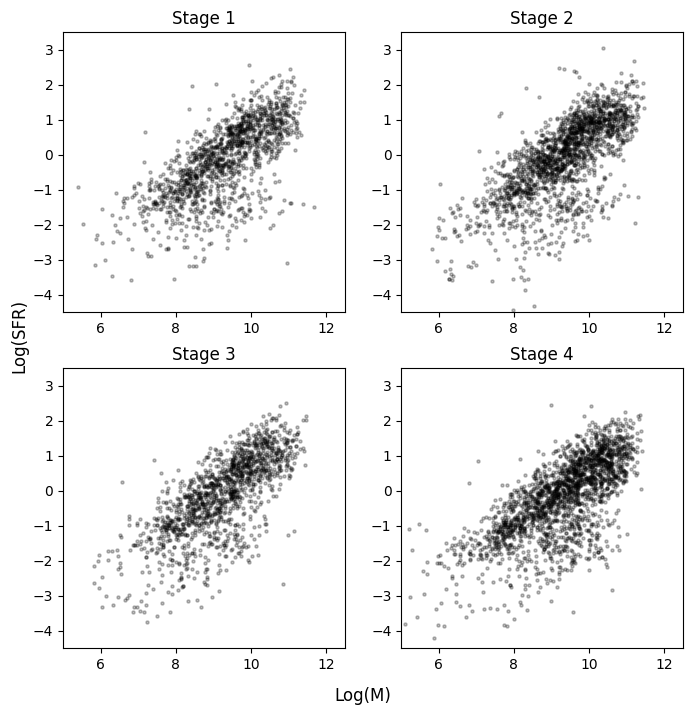

In [158]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_stage_cont.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

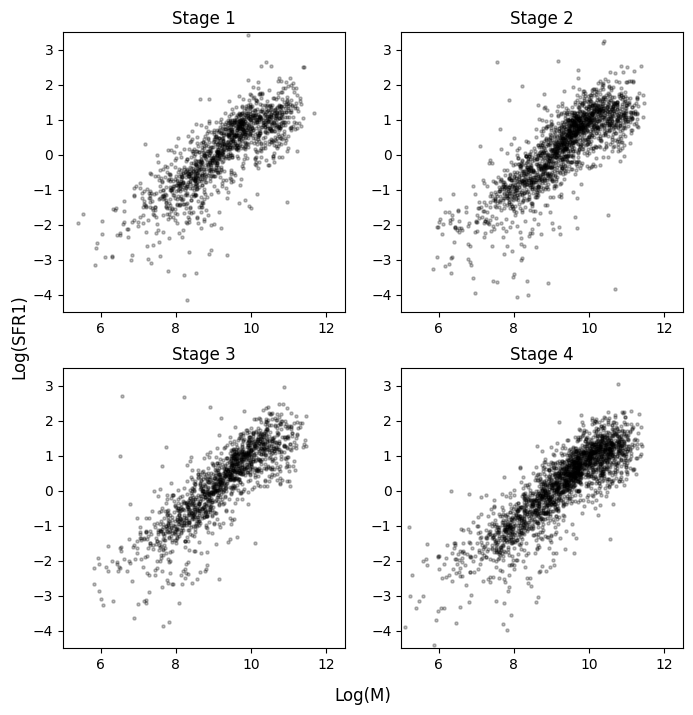

In [160]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_stage_samp.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

In [161]:
df_stage_samp_prim = df_stage_samp.query('gal == "prim"')

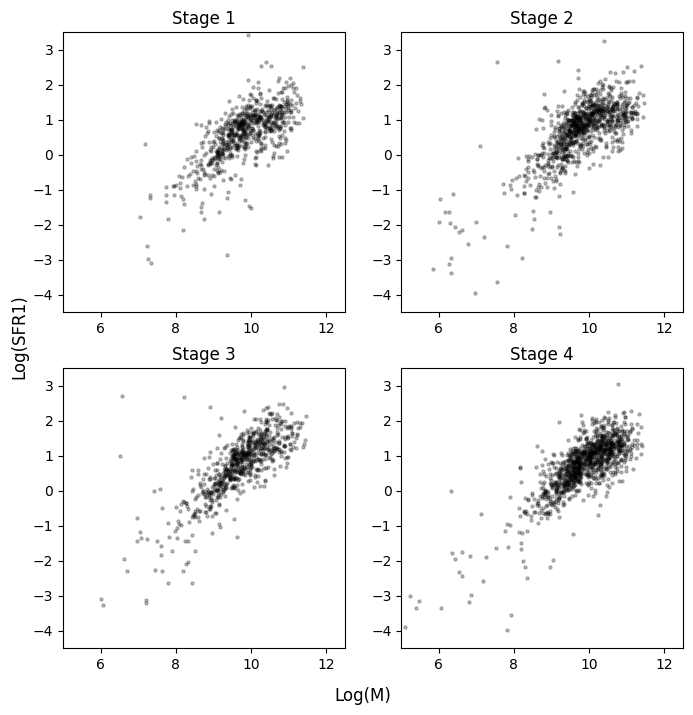

In [162]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_stage_samp_prim.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

In [163]:
df_stage_cont_prim = df_stage_cont.query('gal == "prim"')

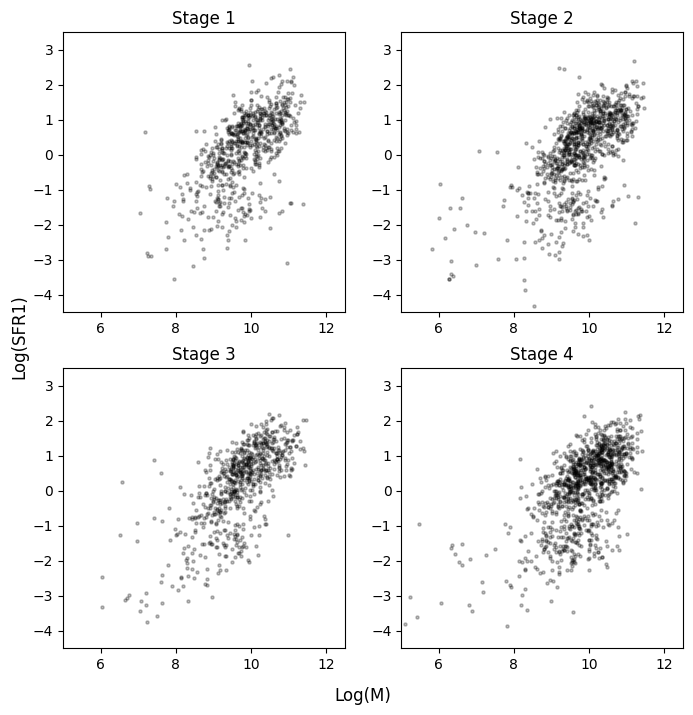

In [165]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_stage_cont_prim.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

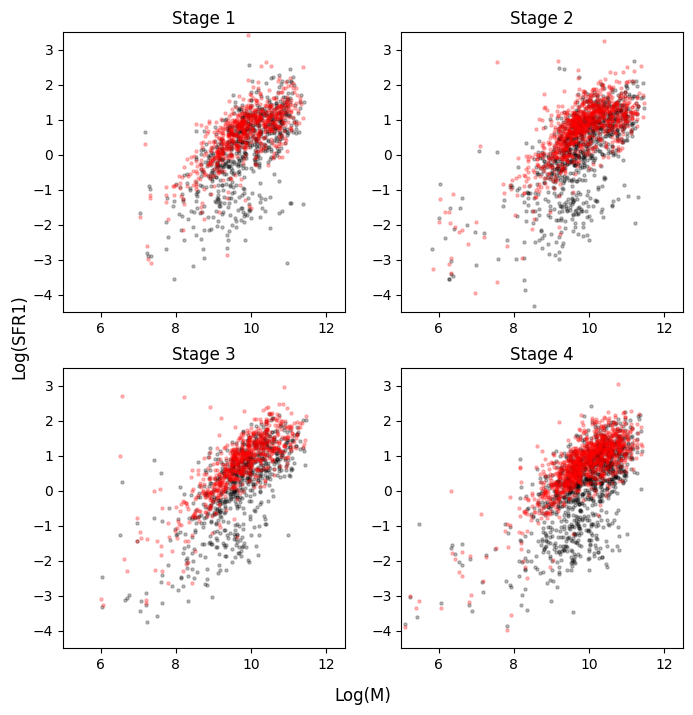

In [171]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_1(df_stage_cont_prim.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        create_plot_2(df_stage_samp_prim.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

In [172]:
df_stage_samp_sec = df_stage_samp.query('gal == "sec"')
df_stage_cont_sec = df_stage_cont.query('gal == "sec"')

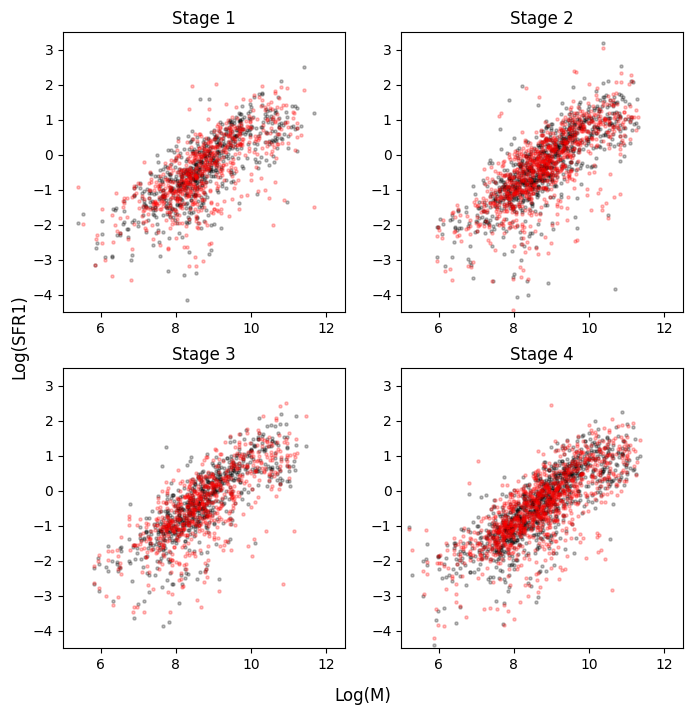

In [173]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_1(df_stage_samp_sec.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        create_plot_2(df_stage_cont_sec.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()